In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sb

# Збір даних та його завантаження
Завантажимо датасет з kaggle, а саме Boston housing pricing

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names, dtype=float)

# Описова статистика для зібраних даних
## Опис стовбців даних
### В загальному існує 14 стовбців з даними:
<br>CRIM - рівень злочинності на душу населення за містом</br>
<br>ZN - частка житлової землі у відсотках, якщо площа займає більше ніж 25000 квадратних футів</br>
<br>INDUS - частка акрів на місто, що не продаються</br>
<br>CHAS - 1, якщо ділянка межує з річкою Чарльз, 0 - ні.</br>
<br>NOX - концентрація оксиду азоту</br>
<br>RM - середня кількість кімнат на житло</br>
<br>AGE - частка зайнятих  будинків у відсотоках, побудованих до 1940 року.</br>
<br>DIS - зважені відстані до п'яти центрів зайнятості у Бостоні</br>
<br>RAD - індекс доступності до магісталей</br>
<br>TAX - податок на майно за 10000 доларів США</br>
<br>PTRATIO - відношення учнів до вчителів за містом</br>
<br>B - 1000 (Bk - 0,63) ^ 2, де Bk - частка чорношкірих за містом</br>
<br>LSTAT - відсоток населення з низьким соціальним статусом</br>
<br>MEDV - середня вартість будинків в 1000 доларів США</br>

### Переглянемо перших п'ять рядків з датасету

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Подивимось інформацію по даним

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Можна побачити, що у нас є 13 стовбиків з даними, в кожному по 506 рядків

### Перевіримо дані на пропуски

In [6]:
print(f'Перевірка на Nan кожного стобчика:\n{df.isna().sum()}')

Перевірка на Nan кожного стобчика:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Виведемо описову статистику по всіх стовбчиках

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Попередньо можна побачити, що стовбець CRIM, ZN мають викиди, що дуже сильно відрізняються від інших значень. Також видно, що CHAS теж має викиди, але це пояснюється специфікою цього стовбця, річка Чарльз не може проходити біля кожної ділянки. Побудуємо графічне представлення даних, для більшої наглядності.

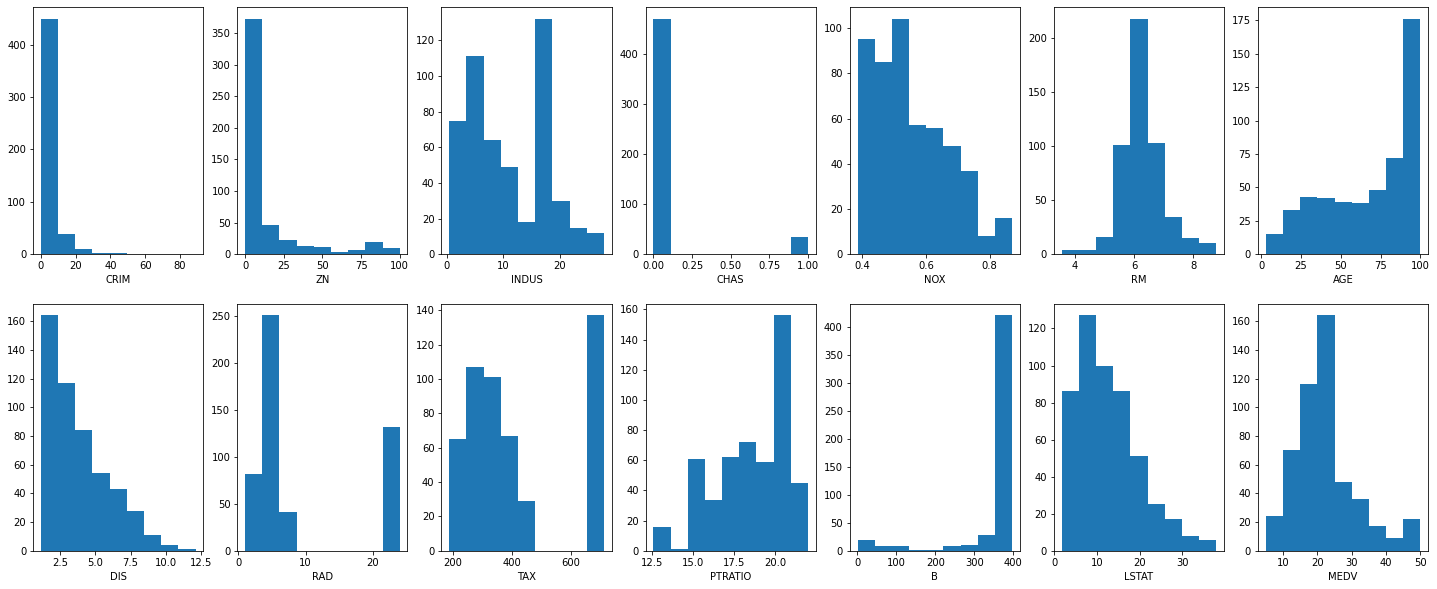

In [8]:
features_names = df.columns
n = len(features_names)
fig, axes = plt.subplots(2, 7, figsize=(25,10))
K = 0
for i in range(2):
    for j in range(7):     
        axes[i,j].hist(df[features_names[K]], bins=9)
        axes[i,j].set_xlabel(features_names[K])
        K+=1
plt.show()

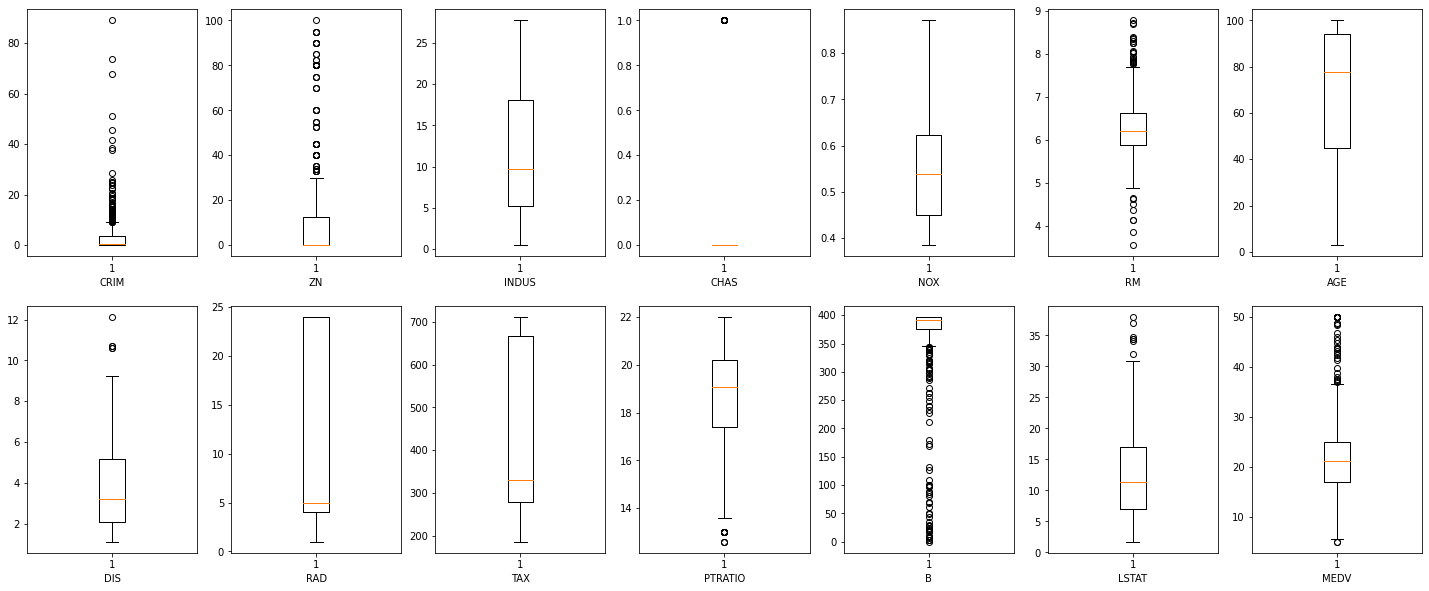

In [9]:
features_names = df.columns
n = len(features_names)
fig, axes = plt.subplots(2, 7, figsize=(25,10))
K = 0
for i in range(2):
    for j in range(7):     
        axes[i,j].boxplot(df[features_names[K]])
        axes[i,j].set_xlabel(features_names[K])
        K+=1
plt.show()

Отже, можемо спостерігати наглядно, що стовбці CRIM, ZN, В та RM мають багато викидів. За попереднім аналізом зроблю висновок, що варто не включати CRIM, ZN, В до навчального набору, великої користі вони не принесуть, але можуть нашкодити. Щодо RM (середня кількість кімнат) можу сказати, що на мою думку це доволі суттєвий показник у виборі житла, тому спробую залишити його. 

# Мета дослідження та питання, на які має дати відповідь моє дослідження
### <br>Метою мого дослідження є прогнозування цін на нерухомість у Бостоні за вхідними даними.</br>
### <br>Питання: Який предиктор найбільше впливає на ціну нерухомості? Який впливає найменше?</br>

#### Подивимось на матрицю розсіювання для наших даних

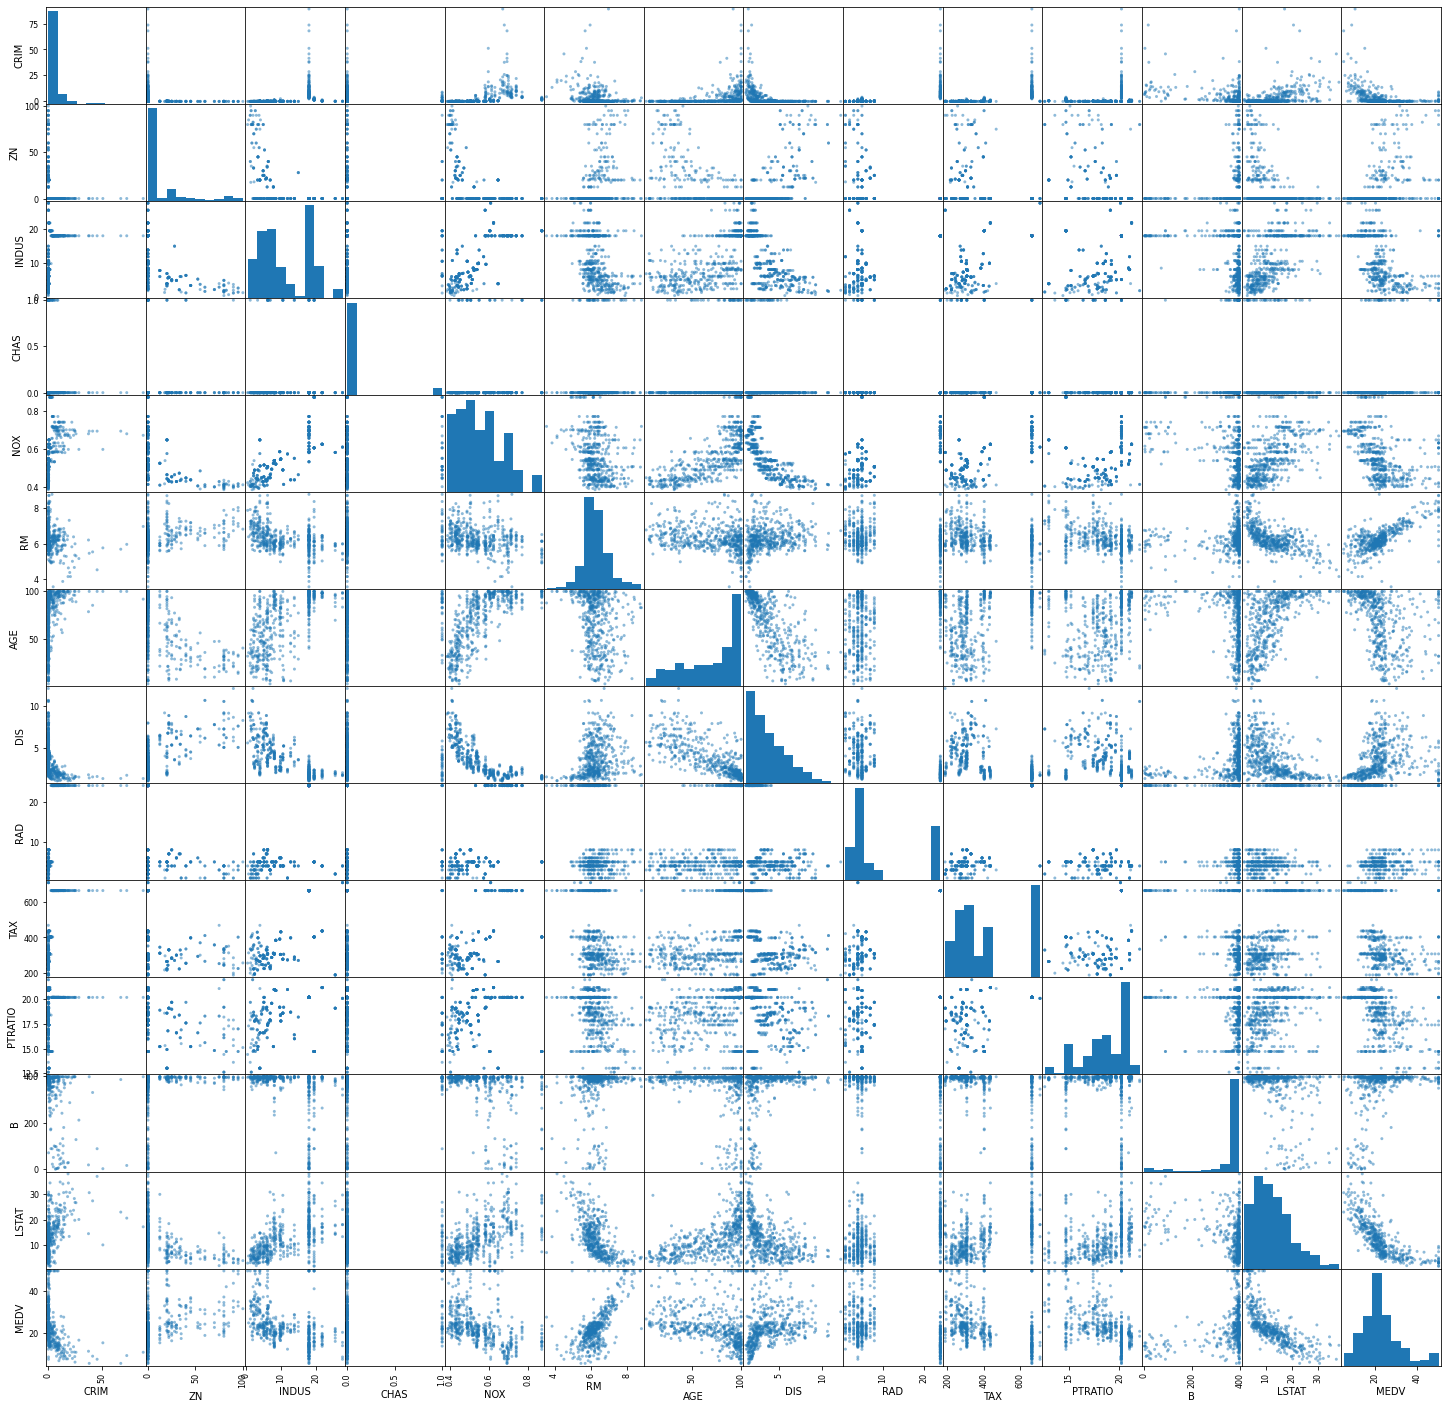

In [9]:
pd.plotting.scatter_matrix(df, figsize=(25,25))
plt.show()

З даної матриці розсіювання чітко видно лінйну залежність між кількістю кімнат та ціною. Також побачив поліноміальну залежність між % жителів з низьким соціальним статусом.

#### Подивимось на кореляційну теплову карту для наших стовбців

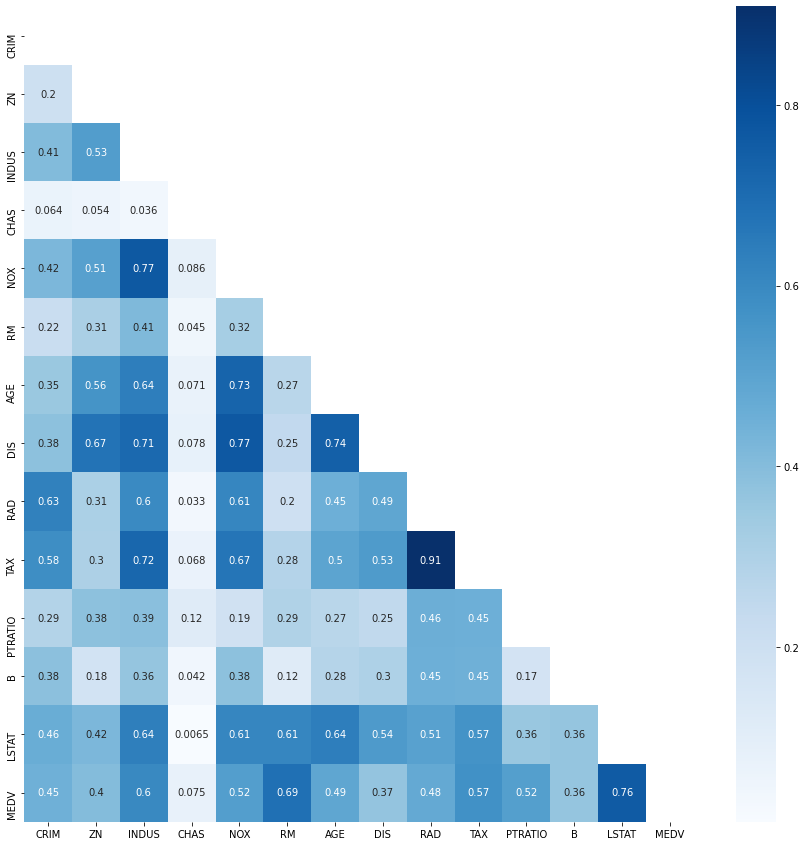

In [10]:
df = df[~(df['MEDV'] >= 50.0)]
mask = np.triu(df.corr().abs())
corr = df.corr().abs()
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(corr, cmap='Blues',annot=True,mask=mask)
plt.show()

З даної телової карти видно, що існує дуже сильна кореляція між NOX і TAX. Також найкраще на ціну впливає (тобто існує зв'язок) INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT. Це є досить непоганою причиною включити ці стобчики в модель для прогнозу.


#### Побудуємо діаграму розсіювання між ціною та INDUS, NOX, RM,AGE, RAD, TAX, PTRATIO, LSTAT

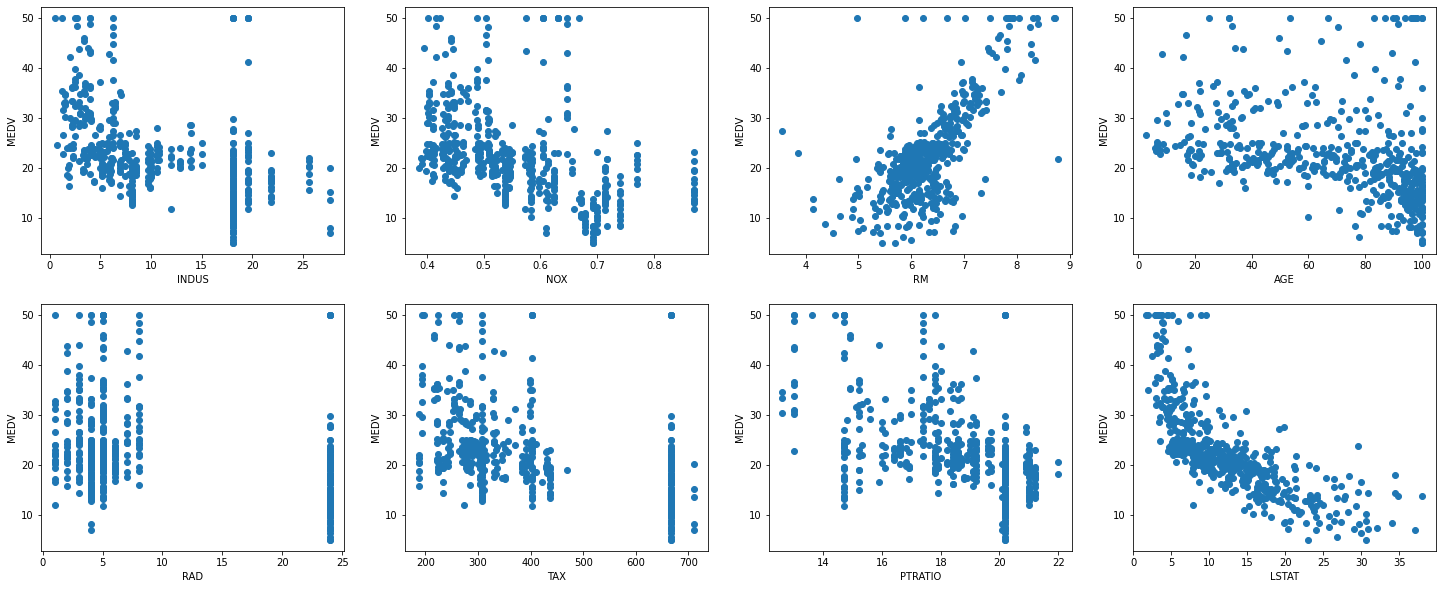

In [12]:
most_corr_features = ['INDUS','NOX','RM','AGE','RAD','TAX','PTRATIO','LSTAT']
medv = df['MEDV']
fig, axes = plt.subplots(2,4, figsize=(25,10))
k = 0
for i in range(2):
    for j in range(4):
        axes[i,j].scatter(df[most_corr_features[k]], medv)
        axes[i,j].set_xlabel(most_corr_features[k])
        axes[i,j].set_ylabel('MEDV')
        k+=1
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [54]:
features = df[['NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']].to_numpy()
target = df['MEDV'].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(features, target ,test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(441, 6)
(49, 6)
(441, 1)
(49, 1)


### Лінійна регресія

In [64]:
scores = []
kf = KFold(n_splits=10)
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1)
# linear_reg.fit(x_train, y_train)
# R2_lin_reg = linear_reg.score(x_test,y_test)
scores = cross_val_score(linear_reg, x_train,y_train, cv=kf)
print(scores.mean())

0.6894390351387545


### Поліноміальна регресія


In [58]:
poly_x_train = PolynomialFeatures(degree=5).fit_transform(x_train)
poly_x_test = PolynomialFeatures(degree=5).fit_transform(x_test)

poly_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1)
poly_reg.fit(poly_x_train, y_train)
R2_poly_reg = poly_reg.score(poly_x_test,y_test)
print(R2_poly_reg)

-32.73168968619649
